# Data Science Course Week 2 - Data Visuaisation

## We will be exploring datasets with Python visualisation libraries

For more information refer to the [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html) and the [Plotly Documentation](https://plot.ly/python/offline/)


### 1. Matplotlib
The easiest way to visualise Pandas Dataframes

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # This styles the graphs in a nicer format

In [2]:
# read drinks.csv into a DataFrame called 'drinks'
drinks = pd.read_table('drinks.csv', sep=',')
drinks = pd.read_csv('drinks.csv')              # assumes separator is comma

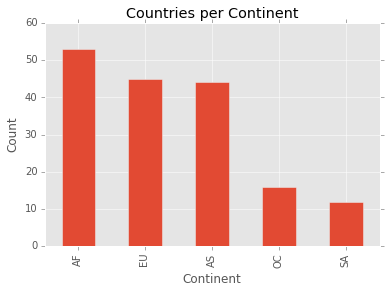

In [3]:
# bar plot of number of countries in each continent
drinks.continent.value_counts().plot(kind='bar', title='Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
#plt.show()                                  # show plot window (if it doesn't automatically appear)
plt.savefig('countries_per_continent.png')  # save plot to file

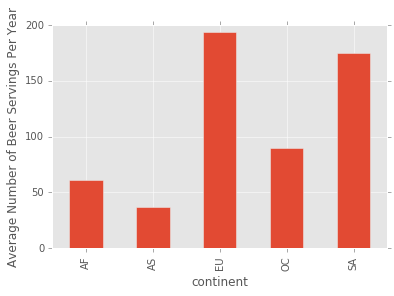

In [3]:
# bar plot of average number of beer servings (per adult per year) by continent
drinks.groupby('continent').beer_servings.mean().plot(kind='bar')
plt.ylabel('Average Number of Beer Servings Per Year')

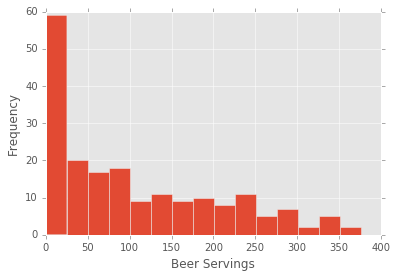

In [4]:
# histogram of beer servings (shows the distribution of a numeric column)
drinks.beer_servings.hist(bins=15)
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')

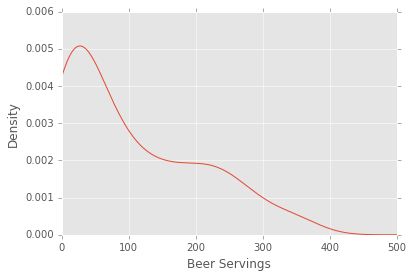

In [5]:
# density plot of beer servings (smooth version of a histogram)
drinks.beer_servings.plot(kind='density', xlim=(0,500))
plt.xlabel('Beer Servings')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bd4ccd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10be613d0>]], dtype=object)

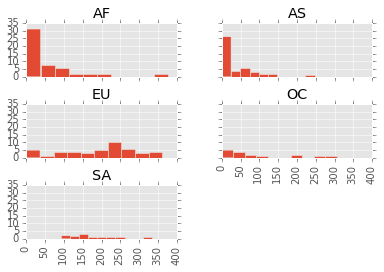

In [7]:
# grouped histogram of beer servings (shows the distribution for each group)
drinks.beer_servings.hist(by=drinks.continent, sharex=True, sharey=True)

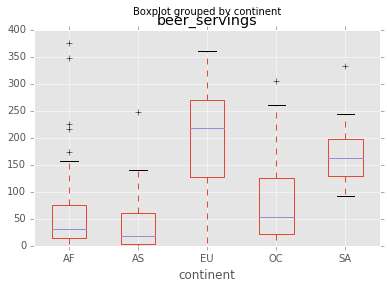

In [6]:
# boxplot of beer servings by continent (shows five-number summary and outliers)
drinks.boxplot(column='beer_servings', by='continent')

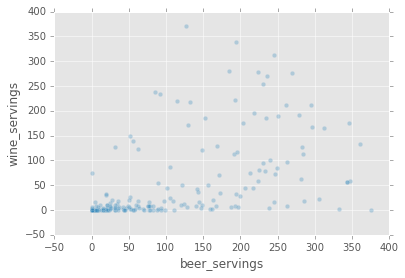

In [7]:
# scatterplot of beer servings versus wine servings
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings', alpha=0.3)

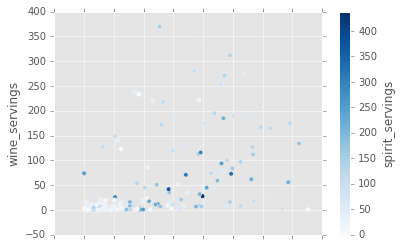

In [8]:
# same scatterplot, except point color varies by 'spirit_servings'
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings', c='spirit_servings', colormap='Blues')

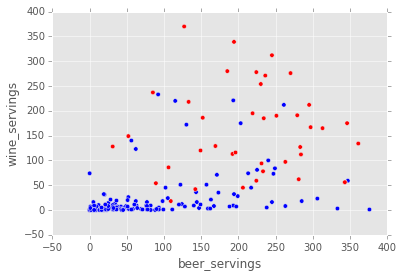

In [14]:
# same scatterplot, except all European countries are colored red
colors = np.where(drinks.continent=='EU', 'r', 'b')
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings', c=colors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ebcbd50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fa0de90>]], dtype=object)

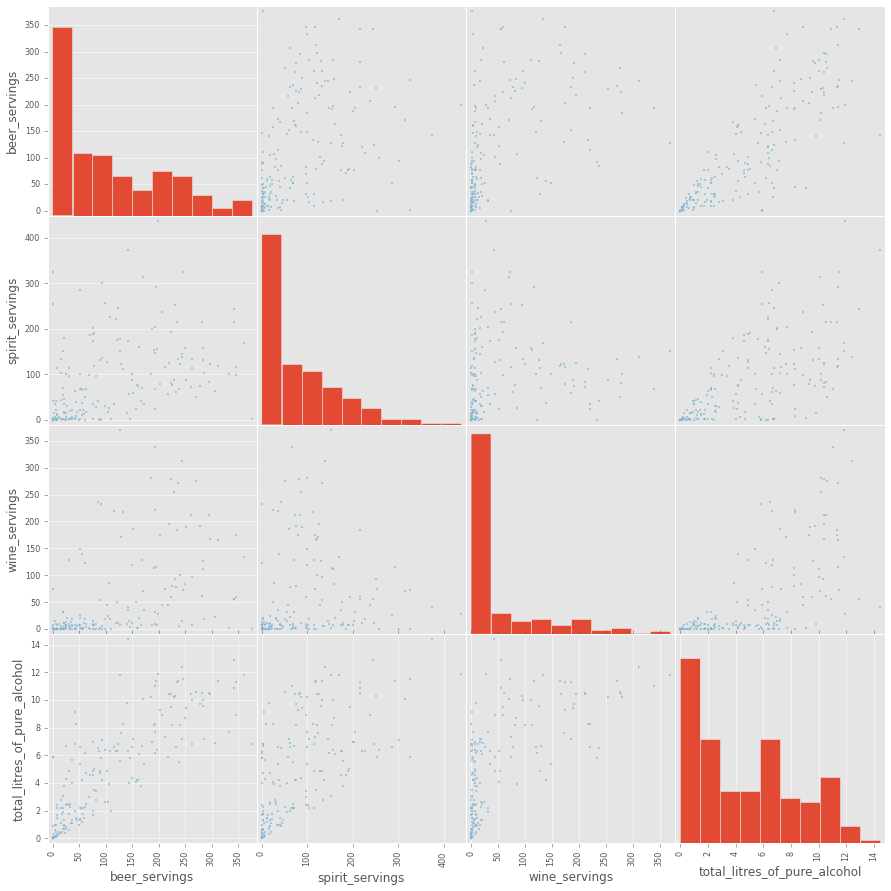

In [16]:
# scatterplot matrix of all numerical columns
pd.scatter_matrix(drinks, figsize=(15,15))

### 2. Plotly
A nice open source library for interactive visualisations

In [1]:
# To run any command at the system shell, simply prefix it with !
# pip won't work from inside python without it
!pip install plotly --upgrade

Requirement already up-to-date: six in c:\users\huangb87\anaconda2\lib\site-packages (from plotly)
  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\huangb87\AppData\Local\pip\Cache\wheels\95\2f\b7\d0e49f367ac9080247612aa78c83ac60ee12f3b9ba848e66bd
Successfully built plotly
  Found existing installation: requests 2.9.1
    Uninstalling requests-2.9.1:
      Successfully uninstalled requests-2.9.1
  Found existing installation: pytz 2016.2
    Uninstalling pytz-2016.2:
      Successfully uninstalled pytz-2016.2


    DEPRECATION: Uninstalling a distutils installed project (requests) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    DEPRECATION: Uninstalling a distutils installed project (pytz) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

print __version__ # requires version >= 1.9.0

1.12.1


In [7]:
init_notebook_mode() # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook

In [8]:
from plotly.graph_objs import *
import numpy as np

In [5]:
# Scatter plot with heatmap
x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

In [9]:
import pandas as pd
df = pd.read_csv('https://plot.ly/~etpinard/191.csv')
df.head(5)

,Africa_Life Expentancy [in years],Africa_text,Africa_marker.size,Africa_Gross Domestic Product per Capita [in USD of the year 2000],Americas_Life Expentancy [in years],Americas_text,Americas_marker.size,Americas_Gross Domestic Product per Capita [in USD of the year 2000],Asia_Life Expentancy [in years],Asia_text,Asia_marker.size,Asia_Gross Domestic Product per Capita [in USD of the year 2000],Europe_Life Expentancy [in years],Europe_text,Europe_marker.size,Europe_Gross Domestic Product per Capita [in USD of the year 2000],Oceania_Life Expentancy [in years],Oceania_text,Oceania_marker.size,Oceania_Gross Domestic Product per Capita [in USD of the year 2000]
0,72.301,Country: Algeria <br>Life Expectancy: 72.30...,33333216.0,6223.367465,75.320,Country: Argentina <br>Life Expectancy: 75....,40301927.0,12779.379640,43.828,Country: Afghanistan <br>Life Expectancy: 4...,3.188992e+07,974.580338,76.423,Country: Albania <br>Life Expectancy: 76.42...,3600523.0,5937.029526,81.235,Country: Australia <br>Life Expectancy: 81....,20434176.0,34435.36744
1,42.731,Country: Angola <br>Life Expectancy: 42.731...,12420476.0,4797.231267,65.554,Country: Bolivia <br>Life Expectancy: 65.55...,9119152.0,3822.137084,75.635,Country: Bahrain <br>Life Expectancy: 75.63...,7.085730e+05,29796.048340,79.829,Country: Austria <br>Life Expectancy: 79.82...,8199783.0,36126.492700,80.204,Country: New Zealand <br>Life Expectancy: 8...,4115771.0,25185.00911
2,56.728,Country: Benin <br>Life Expectancy: 56.728 ...,8078314.0,1441.284873,72.390,Country: Brazil <br>Life Expectancy: 72.39 ...,190010647.0,9065.800825,64.062,Country: Bangladesh <br>Life Expectancy: 64...,1.504483e+08,1391.253792,79.441,Country: Belgium <br>Life Expectancy: 79.44...,10392226.0,33692.605080,NaN,NaN,NaN,NaN
3,50.728,Country: Botswana <br>Life Expectancy: 50.7...,1639131.0,12569.851770,80.653,Country: Canada <br>Life Expectancy: 80.653...,33390141.0,36319.235010,59.723,Country: Cambodia <br>Life Expectancy: 59.7...,1.413186e+07,1713.778686,74.852,Country: Bosnia and Herzegovina <br>Life Ex...,4552198.0,7446.298803,NaN,NaN,NaN,NaN
4,52.295,Country: Burkina Faso <br>Life Expectancy: ...,14326203.0,1217.032994,78.553,Country: Chile <br>Life Expectancy: 78.553 ...,16284741.0,13171.638850,72.961,Country: China <br>Life Expectancy: 72.961 ...,1.318683e+09,4959.114854,73.005,Country: Bulgaria <br>Life Expectancy: 73.0...,7322858.0,10680.792820,NaN,NaN,NaN,NaN


In [12]:
iplot({
    'data': [
        Scatter(x=df[continent+'_Life Expentancy [in years]'],
                y=df[continent+'_Gross Domestic Product per Capita [in USD of the year 2000]'],
                text=df[continent+'_text'],
                marker=Marker(size=df[continent+'_marker.size'], sizemode='area', sizeref=131868,),
                mode='markers',
                name=continent) for continent in ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
    ],
    'layout': Layout(xaxis=XAxis(title='Life Expectancy'), yaxis=YAxis(title='GDP per Capita', type='log'))
}, show_link=False)

NameError: name 'iplot' is not defined

In [10]:

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]

flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )

layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False,
        height = 800,
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )

fig = dict( data=flight_paths + airports, layout=layout )

iplot(fig)